In [113]:
import numpy as np
import pandas as pd
from random import seed, random
import matplotlib.pyplot as plt

In [114]:
from pprint import pprint as print

In [156]:
# matriz de transicion
P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

In [158]:
state = np.array([[1.0, 0., 0.]])


In [160]:
state

array([[1., 0., 0.]])

In [161]:
np.dot(state,P)

array([[0.2, 0.7, 0.1]])

In [166]:
# estado inicial
state = np.array([[1.0, 0., 0.]])
stateHist = state
dfStateHist = pd.DataFrame(state)

In [169]:
pprint(state)
pprint(P)
pprint(np.dot(state,P))

array([[0.50333301, 0.4057579 , 0.09090909]])
array([[0.2, 0.7, 0.1],
       [0.9, 0. , 0.1],
       [0.2, 0.8, 0. ]])
array([[0.48403053, 0.42506038, 0.09090909]])


In [ ]:
                                                 1
                 1                               2                              3
        1         2       3            1         2       3               1       2       3
      1 2 3     1 2 3   1 2 3        1 2 3     1 2 3   1 2 3           1 2 3   1 2 3   1 2 3 

In [174]:
state = np.array([1, 0, 0])
for x in range(50):
    state = np.dot(state,P)
    #print(state)
print(state)

array([0.49197862, 0.41711229, 0.09090909])


In [177]:
state = np.array([0, 0, 1])
for x in range(50):
    state = np.dot(state,P)
    #print(state)
print(state)

array([0.49197862, 0.41711229, 0.09090909])


In [178]:
state@P

array([0.4919786 , 0.41711231, 0.09090909])

In [165]:
for x in range(500):
    state = np.dot(state,P)
print(state)

array([[0.49197861, 0.4171123 , 0.09090909]])


Vimos que para la distribución estacionaria, $$\pi = \pi \; P$$

In [139]:
print(state)
print(np.dot(state,P))

array([[0.49197861, 0.4171123 , 0.09090909]])
array([[0.49197861, 0.4171123 , 0.09090909]])


In [181]:
Pn = np.linalg.matrix_power(P,500)

In [182]:
Pn

array([[0.49197861, 0.4171123 , 0.09090909],
       [0.49197861, 0.4171123 , 0.09090909],
       [0.49197861, 0.4171123 , 0.09090909]])

In [180]:
state = np.array([1,0,0])
state@Pn

array([0.49198767, 0.41710324, 0.09090909])

In [153]:
state*Pn

array([[0.24204741, 0.17397889, 0.00826446],
       [0.24203632, 0.17398829, 0.00826446],
       [0.24204926, 0.17397732, 0.00826446]])

In [154]:
state

array([[0.49197861, 0.4171123 , 0.09090909]])

___________
Ahora guardamos las cadenas

In [128]:
state = np.array([[1.0, 0., 0.]])
for x in range(500):
    state = np.dot(state,P)
    stateHist = np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)

In [129]:
dfDistrHist

,0,1,2
0,1.000000,0.000000,0.000000
1,0.200000,0.700000,0.100000
2,0.690000,0.220000,0.090000
3,0.354000,0.555000,0.091000
4,0.588500,0.320600,0.090900
...,...,...,...
496,0.491979,0.417112,0.090909
497,0.491979,0.417112,0.090909
498,0.491979,0.417112,0.090909
499,0.491979,0.417112,0.090909


In [130]:
dfDistrHist.iloc[-1]

0    0.491979
1    0.417112
2    0.090909
Name: 500, dtype: float64

<AxesSubplot:>

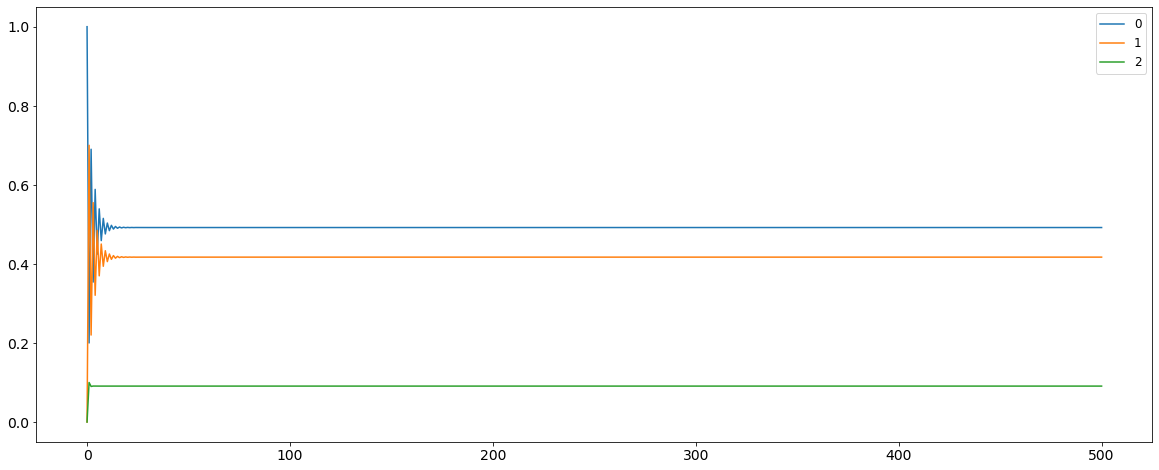

In [131]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot()
dfDistrHist.plot(ax=ax)

In [132]:
P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])

stateChangeHist= np.array([[0.0,  0.0,  0.0],
                          [0.0, 0.0,  0.0],
                          [0.0, 0.0,  0.0]])

state = np.array([[1.0, 0.0, 0.0]])
currentState = 0
stateHist = state
dfStateHist = pd.DataFrame(state)
distr_hist = [[0,0,0]]
seed(4)

In [133]:
# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
    r=np.random.uniform(0.0, 1.0)
    CS=np.cumsum(vmultinomial)
    CS=np.insert(CS,0,0)
    m=(np.where(CS<r))[0]
    nextState=m[len(m)-1]
    return nextState

In [134]:
for x in range(100):
    currentRow=np.ma.masked_values((P[currentState]), 0.0)
    nextState=simulate_multinomial(currentRow)
    # Keep track of state changes
    stateChangeHist[currentState,nextState]+=1
    # Keep track of the state vector itself
    state=np.array([[0,0,0]])
    state[0,nextState]=1.0
    # Keep track of state history
    stateHist=np.append(stateHist,state,axis=0)
    currentState=nextState
    # calculate the actual distribution over the 3 states so far
    totals=np.sum(stateHist,axis=0)
    gt=np.sum(totals)
    distrib=totals/gt
    distrib=np.reshape(distrib,(1,3))
    distr_hist=np.append(distr_hist,distrib,axis=0)

array([[0.4950495 , 0.41584158, 0.08910891]])
array([[0.26      , 0.66      , 0.08      ],
       [0.87804878, 0.        , 0.12195122],
       [0.        , 1.        , 0.        ]])


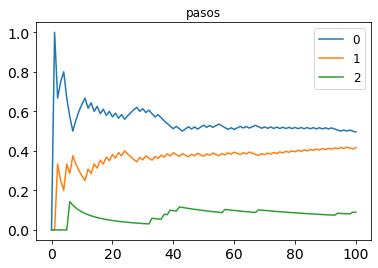

In [135]:
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
print(P_hat)
dfDistrHist = pd.DataFrame(distr_hist)
dfDistrHist.plot(title="pasos")
plt.show()